# **Prediction using Supervised ML**
## **GRIP TASK #1**
### Domain: **Data Science and Business Analytics**
#### **Jan 2021**


## Author: **Parikshit Ranjeet Raje**
### **Aim: To Predict the percentage of a student based on the number of study hours using Linear Regression.**

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sn

#reading data from link
data=pd.read_csv("http://bit.ly/w-data")

#printing first 8 rows
data.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [2]:
#dimentionality of dataFrame
print(data.shape, "\n")
#cheking the datatypes
print(data.dtypes)

(25, 2) 

Hours     float64
Scores      int64
dtype: object


In [3]:
#calculating statistical data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


[Text(0, 0.5, 'Score Percentage'),
 Text(0.5, 0, 'Number of Hours Studied'),
 Text(0.5, 1.0, 'Percentage Score vs Hours studied')]

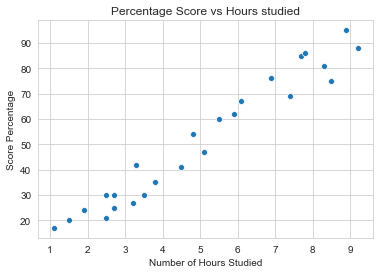

In [4]:
#plotting the data/ visualising the data
sn.set_style('whitegrid') 
sp=sn.scatterplot(x ="Hours", y ="Scores", data = data)
sp.set(xlabel="Number of Hours Studied", ylabel = "Score Percentage", title="Percentage Score vs Hours studied")

In [5]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [7]:
#splitting into training and testing data 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression  
lreg = LinearRegression()  
#fitting the model
lreg.fit(x_train, y_train) 
print("Training complete.")

Training complete.


In [9]:
lreg.score(x_train, y_train)

0.9484997422695115

Accuracy of Training Set= 94.84997422695115 %


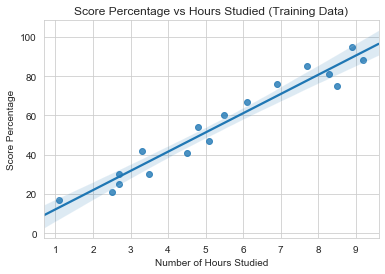

In [10]:
#visualising training set
regtrain=sn.regplot(x =x_train, y =y_train, data = data)
regtrain.set(xlabel="Number of Hours Studied", ylabel = "Score Percentage", title="Score Percentage vs Hours Studied (Training Data)")
print("Accuracy of Training Set= " + str(lreg.score(x_train, y_train)*100) +" %")

Accuracy of Testing Set= 95.68211104435257 %


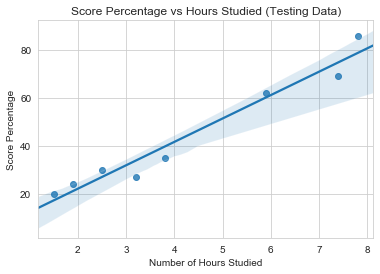

In [11]:
#visualising testing set
regtest=sn.regplot(x =x_test, y =y_test, data = data)
regtest.set(xlabel="Number of Hours Studied", ylabel = "Score Percentage", title="Score Percentage vs Hours Studied (Testing Data)")
print("Accuracy of Testing Set= " + str(lreg.score(x_test, y_test)*100) +" %")


In [12]:
#intercepts and coefficients
print("Intercept of regression line : ", lreg.intercept_)
print("Coefficient of regression line : ", lreg.coef_)

Intercept of regression line :  2.370815382341881
Coefficient of regression line :  [9.78856669]


[Text(0, 0.5, 'Score Percentage'),
 Text(0.5, 0, 'Number of Hours Studied'),
 Text(0.5, 1.0, 'Score Percentage vs Hours Studied (with Regression Line)')]

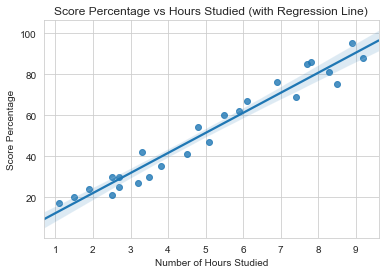

In [13]:
#plotting regression line
regp=sn.regplot(x =x, y =y, data = data)
regp.set(xlabel="Number of Hours Studied", ylabel = "Score Percentage", title="Score Percentage vs Hours Studied (with Regression Line)")

In [14]:
#prediction of testing data
print(x_test)
y_pred = lreg.predict(x_test) 
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Predicted Percentages': y_pred,'Actual  Percentages': y_test})  
df 

,Predicted Percentages,Actual Percentages
0,17.053665,20
1,33.694229,27
2,74.806209,69
3,26.842232,30
4,60.123359,62
5,39.567369,35
6,20.969092,24
7,78.721636,86


In [16]:
# prediction of score percentage after studying for 9.25 hours/day
qd=np.array(9.25)
qd=qd.reshape(-1,1)
own_pred = lreg.predict(qd)
print("No of Hours = {}".format(qd))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


In [17]:
#mean absolute error
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652


In [18]:
#R square
print('R square:', metrics.r2_score(y_test, y_pred))

R square: 0.9568211104435257
